<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Examining_Nuclear_Energy_Use_Trends_Linear_Predictions_James_Korman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSTEP21 // Assignment #1 (GGD: Total = 34 / 35)**

assigned : **Sep 4, 2021**

DUE : **Sep 12, 2021 11:59pm**

## **Alternative and Nuclear Energy Use Trends**

<img src="https://www.techrepublic.com/a/hub/i/r/2020/10/21/88c374fe-8fa8-49a9-9b4c-fc2a7a881400/resize/1200x/2bedb66f52c7d89171a70fedf5977a96/istock-1268370995.jpg" width=250x>

<img src="https://wbwaterdata.org/uploads/group/2020-07-12-132413.117294world-bank-logo-png-5.png" width=250x>

---

### OVERVIEW

This assignment uses "open data" from the [World Bank](https://data.worldbank.org/) to explore the rate of adoption of alternative and nuclear energy sources globally.  In particular, you will attempt to address the following Problem Statement:

<i>**"How does the rate of adoption of alternative and nuclear energy by the United States over the past ~50 years compare with that of the European Union?"**</i>

<br>

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please move it (right click and select "Move To") to the google drive folder `dstep21/assignments/submissions/<username>/` to share it with me before the due date and time.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.


2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

### **PART 1 - Problem Statement**

Good Data Science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  In fact, Data Science itself might be considered as <u>*computation with context*</u>.  To that end:

**In order to provide context around the problem statement given in the Overview above, please read through the following <small>(and potentially some of the references therein)</small>:**

<i>

1. [U.S. Lagging Far Behind Europe On Renewables, New Report Shows
](https://www.forbes.com/sites/davidrvetter/2020/03/09/us-lagging-far-behind-europe-on-renewables-new-report-shows/?sh=1d181fc133f4)

2. [International Energy Agency: Data & Statistics](https://www.iea.org/data-and-statistics/data-products) (the source of the data aggregated by the World Bank)

2. [A Critical Review of Sustainable Energy Policies for the Promotion of Renewable Energy Sources
](https://www.mdpi.com/2071-1050/12/12/5078)

3. [Analysis of renewable energies in European Union
](https://www.sciencedirect.com/science/article/pii/S1364032115012319?casa_token=o-jrU6W3PekAAAAA:VdTPI6z422__PZ0GYoY9vFc3IraDxvs_PDbtVQnFiJ7NWV1eelzq3yhliLl_9v1_wKmGv88)

4. [Renewable energy is growing fast in the U.S., but fossil fuels still dominate](https://www.pewresearch.org/fact-tank/2020/01/15/renewable-energy-is-growing-fast-in-the-u-s-but-fossil-fuels-still-dominate/)

</i>

<small>* Note that, for this assignment, this section only requires that you briefly read through and browse these references.  Future assignments will involve identifying policy-relevant references specific to the Problem Statement and summarizing them for context.</small>

### **PART 2 - Data Collection**

**Copy the link for the *Excel* file from [this World Bank Open Data](https://data.worldbank.org/indicator/EG.USE.COMM.CL.ZS?locations=US) site and put it into a variable called `fname` as a string.**

In [ ]:
import pandas as pd 

In [ ]:
fname = "https://api.worldbank.org/v2/en/indicator/EG.USE.COMM.CL.ZS?downloadformat=excel" 

**Load the file into a `pandas` DataFrame called `data` similarly to how we did in class, but with three minor differences: (GGD: -1 [didn't set `"sheet_name"`])**

1. **use `pd.read_excel` instead of `pd.read_csv`,**
2. **set `skiprows=3`,**
3. **also set `sheet_name="Data"`.**

The last two (`skiprows` and `sheet_name`) are called "keywords" in python and are additional inputs that can be given to the `pd.read_csv` function$^\dagger$.

<small>$^\dagger$ recall that "functions" in python are constructs that tell python to do things</small>

In [ ]:
import pandas as pd 

In [ ]:
Data = pd.read_excel(fname, skiprows = 3)

### **PART 3 - Data Preparation**

In [ ]:
Data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726261,1.057346,1.056614,1.365164,1.417021,1.528770,1.663894,1.558105,1.560023,1.393254,1.394037,1.317128,1.268408,1.802935,2.057478,2.700695,2.105050,2.799851,2.943618,2.081310,2.186884,2.233992,1.836533,2.100294,2.224634,2.292018,2.349575,2.451677,2.321523,2.459667,2.288112,2.509645,2.604896,2.593332,2.408646,2.403366,2.393256,2.431857,2.420201,2.504935,2.624055,2.558147,2.763343,2.584831,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.084481,1.119014,1.214438,1.291871,1.337377,1.384875,1.353189,1.115849,1.413199,1.458066,1.481267,1.428520,0.993785,0.929082,1.231684,1.411651,1.347860,1.441170,1.504346,1.143933,1.213449,1.200184,1.209365,1.139237,1.240211,1.225334,1.167044,0.915970,1.008633,1.039284,0.983828,0.970338,0.862664,0.931577,0.924158,0.837739,0.799720,0.894148,0.857032,0.838698,0.853197,0.855089,0.814806,0.834197,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.351166,1.410646,1.694730,1.748593,1.982570,0.903806,0.916739,1.028038,1.065822,1.121397,1.114046,1.197734,1.067446,1.098590,1.208085,1.194329,1.166168,1.120664,1.110309,0.742242,0.738678,0.802166,0.820624,0.813644,0.818385,0.816589,0.950384,1.095975,0.880335,0.873405,0.933956,1.002053,1.028346,1.178593,1.609625,2.062969,1.776957,2.145972,1.949433,2.250755,2.352302,2.017802,2.546607,2.548840,NaN,NaN,NaN,NaN,NaN,NaN


**Sub-select only the columns with names that are years (i.e., "1960", "1961", ...) before 2016 and put the resulting DataFrame into a new DataFrame called `sub`.**

In [ ]:
cols = Data.columns[4:60]
sub = Data[cols]




In [ ]:
sub.head(5)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726261,1.057346,1.056614,1.365164,1.417021,1.528770,1.663894,1.558105,1.560023,1.393254,1.394037,1.317128,1.268408,1.802935,2.057478,2.700695,2.105050,2.799851,2.943618,2.081310,2.186884,2.233992,1.836533,2.100294,2.224634,2.292018,2.349575,2.451677,2.321523,2.459667,2.288112,2.509645,2.604896,2.593332,2.408646,2.403366,2.393256,2.431857,2.420201,2.504935,2.624055,2.558147,2.763343,2.584831,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.084481,1.119014,1.214438,1.291871,1.337377,1.384875,1.353189,1.115849,1.413199,1.458066,1.481267,1.428520,0.993785,0.929082,1.231684,1.411651,1.347860,1.441170,1.504346,1.143933,1.213449,1.200184,1.209365,1.139237,1.240211,1.225334,1.167044,0.915970,1.008633,1.039284,0.983828,0.970338,0.862664,0.931577,0.924158,0.837739,0.799720,0.894148,0.857032,0.838698,0.853197,0.855089,0.814806,0.834197,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.351166,1.410646,1.694730,1.748593,1.982570,0.903806,0.916739,1.028038,1.065822,1.121397,1.114046,1.197734,1.067446,1.098590,1.208085,1.194329,1.166168,1.120664,1.110309,0.742242,0.738678,0.802166,0.820624,0.813644,0.818385,0.816589,0.950384,1.095975,0.880335,0.873405,0.933956,1.002053,1.028346,1.178593,1.609625,2.062969,1.776957,2.145972,1.949433,2.250755,2.352302,2.017802,2.546607,2.548840,NaN


**Create a column called `"Country Name"` in `sub` that is the values from the `"Country Name"` column from `data`.**$^\dagger$

<small>$^\dagger$ ignore the warning that you get, but make sure you print `sub` so that you can see that it worked.</small>

In [ ]:
sub["Country Name"]=Data["Country Name"]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# -- add those values as a new column in the original DataFrame
sub.head(5)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726261,1.057346,1.056614,1.365164,1.417021,1.528770,1.663894,1.558105,1.560023,1.393254,1.394037,1.317128,1.268408,1.802935,2.057478,2.700695,2.105050,2.799851,2.943618,2.081310,2.186884,2.233992,1.836533,2.100294,2.224634,2.292018,2.349575,2.451677,2.321523,2.459667,2.288112,2.509645,2.604896,2.593332,2.408646,2.403366,2.393256,2.431857,2.420201,2.504935,2.624055,2.558147,2.763343,2.584831,NaN,Africa Eastern and Southern
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.084481,1.119014,1.214438,1.291871,1.337377,1.384875,1.353189,1.115849,1.413199,1.458066,1.481267,1.428520,0.993785,0.929082,1.231684,1.411651,1.347860,1.441170,1.504346,1.143933,1.213449,1.200184,1.209365,1.139237,1.240211,1.225334,1.167044,0.915970,1.008633,1.039284,0.983828,0.970338,0.862664,0.931577,0.924158,0.837739,0.799720,0.894148,0.857032,0.838698,0.853197,0.855089,0.814806,0.834197,NaN,Africa Western and Central
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.351166,1.410646,1.694730,1.748593,1.982570,0.903806,0.916739,1.028038,1.065822,1.121397,1.114046,1.197734,1.067446,1.098590,1.208085,1.194329,1.166168,1.120664,1.110309,0.742242,0.738678,0.802166,0.820624,0.813644,0.818385,0.816589,0.950384,1.095975,0.880335,0.873405,0.933956,1.002053,1.028346,1.178593,1.609625,2.062969,1.776957,2.145972,1.949433,2.250755,2.352302,2.017802,2.546607,2.548840,NaN,Angola


**Run the cell below (no need to figure out what it's doing, we will go over all of this syntax in time).**

In [ ]:
# -- reformat the data
ae_yr = sub.set_index("Country Name").T.reset_index().rename(columns={"index":"year"}).astype(float)

In [ ]:
ae_yr.head(5)

Country Name,year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,...,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092123,8.964336,NaN,NaN,0.064140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.062296,0.100326,23.681824,NaN,...,NaN,NaN,NaN,NaN,NaN,0.216640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806109,NaN,NaN,NaN,NaN,0.806109,NaN,1.261261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.727828,NaN,NaN,NaN,NaN,NaN,NaN
1,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.216693,8.748101,NaN,NaN,0.068843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.452543,0.091526,23.501717,NaN,...,NaN,NaN,NaN,NaN,NaN,0.237760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002690,NaN,NaN,NaN,NaN,1.002690,NaN,1.334758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800560,NaN,NaN,NaN,NaN,NaN,NaN
2,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240643,8.337474,NaN,NaN,0.058123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.894714,0.108225,20.818427,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815474,NaN,NaN,NaN,NaN,0.815474,NaN,1.430062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.764664,NaN,NaN,NaN,NaN,NaN,NaN
3,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.578166,7.468122,NaN,NaN,0.087126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.150130,0.091317,18.194603,NaN,...,NaN,NaN,NaN,NaN,NaN,0.327022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.480681,NaN,NaN,NaN,NaN,1.480681,NaN,1.365391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.773203,NaN,NaN,NaN,NaN,NaN,NaN
4,1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.572712,8.157981,NaN,NaN,0.081804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.418460,0.095854,18.003202,NaN,...,NaN,NaN,NaN,NaN,NaN,0.269391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.105815,NaN,NaN,NaN,NaN,1.105815,NaN,1.400595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.778784,NaN,NaN,NaN,NaN,NaN,NaN


Notice now that you have a table in `ae_yr` that is very similar to the sea level rise table in class with one column that is the year, and the other columns are various geographic regions, the values of which are the % of energy use from alternative and nuclear sources.

**Make plots of the alternative and nuclear energy use percentage as a function of year for the United States and the European Union.**

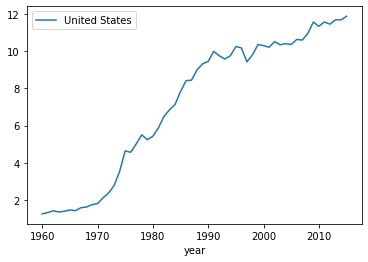

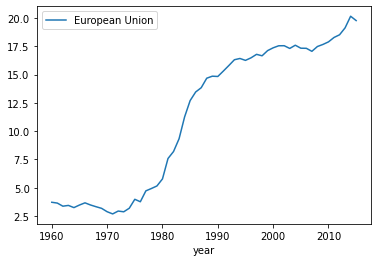

In [ ]:
ae_yr.plot("year", "United States")
ae_yr.plot("year", "European Union")

### **PART 4 - "Machine Learning"**

**Fit a straight line to each of the above time series (one straight line for the US and one for the EU) using `np.polyfit` as we did in class.**

In [ ]:
import numpy as np

United States 

In [ ]:
# -- perform a linear regression (Alternative Energy Use = slope * year + offset)
params = np.polyfit(ae_yr["year"], ae_yr["United States"], 1)

# -- the output of np.polyfit is a list with the slope and offset, put 
#    them in their own variables
slope = params[0]
offset = params[1]

In [ ]:
params

array([ 2.23425080e-01, -4.36894925e+02])

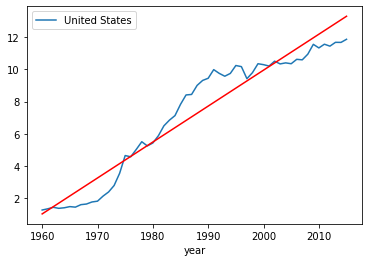

In [ ]:
# -- plot the model
ax = ae_yr.plot("year", "United States")
ax.plot(ae_yr["year"], slope * ae_yr["year"] + offset, color="red")

European Union

In [ ]:
# -- perform a linear regression (Alternative Energy Use = slope * year + offset)
params = np.polyfit(ae_yr["year"], ae_yr["European Union"], 1)

# -- the output of np.polyfit is a list with the slope and offset, put 
#    them in their own variables
slope = params[0]
offset = params[1]

In [ ]:
params

array([ 3.73505536e-01, -7.31033181e+02])

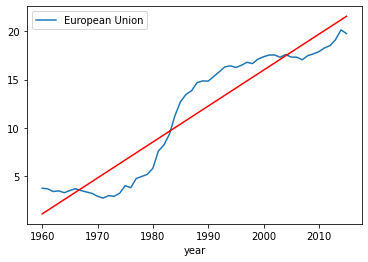

In [ ]:
# -- plot the model
ax = ae_yr.plot("year", "European Union")
ax.plot(ae_yr["year"], slope * ae_yr["year"] + offset, color="red")

### **PART 5 - Problem Solution**

 **Compare the rate of adoption of alternative and nuclear energy sources (in % per year) for the US and the EU.**

According to our linear regression models ran on the rate of adoption of alternative and nuclear energy sources (% per year) for the US and the EU -- the EU is adopting alternative and nuclear energy sources at a rate that is nearly double that of the United States. For the United States -- for every year that goes by -- there is a corresponding 2.23 **(GGD: careful with your decimals...)** perecentage increase in the adoption of alternative and nuclear energy sources. Meanwhile, for the European Uinon -- for every additional year -- there is a corresponding 3.74 % increase in the adoption of alternative and nuclear energy sources. Descriptively speaking, upon examination of the time series plots for the EU and the US we see that at the start of our time series at year 1960 -- both regions have less than a 3% total adoption of alternative and nuclear energy sources. However, as we move across the x-axis on our series we notice for the US in 2015 is sitting at a total % of adoption of alternative/nuclear energy of just under 12%. Meanwhile, for the EU in 2015 at the end of the x-axis for the EU time series -- total adoption of alternative/nuclear energy % is just under 20%. Overall, these findings corroborate what the literature has told us in this area that the EU is far outpacing the United States in the adoption of these alternative energy sources in the last ~50 years. This demonstrates that the US should continue to move away from fossile fuels and rather than diversify energy sources into natural gas -- the US should increase its adoption of renewable energy as the European Union has done in order to help stave off the impacts of climate change and make the world more sustainable.

**Is a straight line a "good" model in these cases?  Why or why not? <br> Is it a "better" model for one or the other?  Why or why not?**

A straight line model is "ok" in these cases as it gives us a general blueprint of what we are looking at in terms of alternative energy adoption. However -- this simple linear model we have executed here ignores the fact that there is time dependence in the data and thus by running the two models we had run -- we are not taking into account the autoregressive processes at play. There is autocorrelation that we have not proprerly accounted for. Thus, our model estimates may be suffering from some bias and inefficiency in their estimates. Moreover -- a cursorary glance at the charts presented above for the EU and US respectively clearly demonstrate that our data is non-stationary. For future analysis -- we may want to confirm this non-stationarity with a Durbon Watsin Test or Philips Peron and difference the data accordingly and rerun the model taking into account the autoregressive processes at play. Another alternative we could do if we wanted to ignore the autocorrelation/time dependence -- is we could implement a quadratic model to better fit the data as the time series shows that there is definitely some curvilinearity in the series. Overall, however, a straight line model provides us with a succint output to understand the differences in the rate of adoption of alternative energy sources between the EU and US in a relatively straight forward way if we are okay with treating time as a "nuisance to be shoved to the side and forgotten about". 

With respect to if the straight line model is a better model for one series relative to the other -- I would argue that it is better for the United States given that the US time series is more linear in nature and is exhibting less heterscedasticity than the EU series. Still -- I would argue that a straight line model is not optimal for either series due to the reasons mentioned above.

